#### Dataset

In [1]:
# Dataset: Social_Network_Ads.csv
# Location: https://mitu.co.in/dataset

#### Import the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Read the dataset

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.shape

(400, 5)

In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [6]:
# Check for the missing values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#### Separate the input and output data

In [7]:
# input data
x = df[['Age','EstimatedSalary']]

# output data
y = df['Purchased']

In [8]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [9]:
set(y)

{0, 1}

In [10]:
np.unique(y)

array([0, 1])

In [11]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<AxesSubplot:xlabel='Purchased', ylabel='count'>

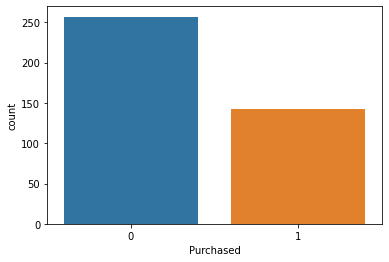

In [12]:
import seaborn as sns
sns.countplot(x = y)

#### Visualize the data

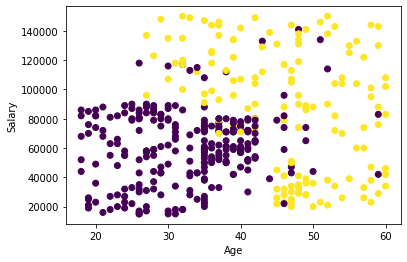

In [13]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(x['Age'], x['EstimatedSalary'], c=y)

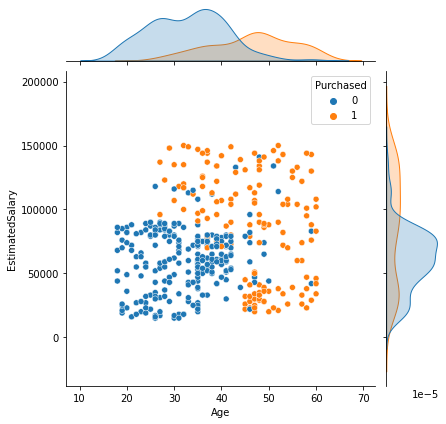

In [14]:
sns.jointplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df)

In [15]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


#### Cross-validation

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.25)

In [19]:
x_train.shape

(300, 2)

In [20]:
x_test.shape

(100, 2)

#### Build the model

In [21]:
# import the class
from sklearn.naive_bayes import GaussianNB

In [22]:
# create the object
classifier = GaussianNB()

In [23]:
# train the model
classifier.fit(x_train, y_train)

GaussianNB()

#### Prediction on unseen data

In [24]:
y_pred = classifier.predict(x_test)

#### Performance Evaluation

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score

In [26]:
y_test.value_counts()

0    68
1    32
Name: Purchased, dtype: int64

In [27]:
confusion_matrix(y_test, y_pred)

array([[65,  3],
       [ 7, 25]])

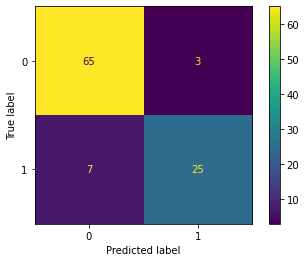

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [29]:
accuracy_score(y_test, y_pred)

0.9

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



#### Boosting of Naive Bayes

In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
adb = AdaBoostClassifier(classifier, random_state=0, n_estimators=10)

In [40]:
adb.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=GaussianNB(), n_estimators=10, random_state=0)

In [41]:
y_pred = adb.predict(x_test)

In [42]:
accuracy_score(y_test, y_pred)

0.93

In [43]:
adb.estimators_

[GaussianNB(),
 GaussianNB(),
 GaussianNB(),
 GaussianNB(),
 GaussianNB(),
 GaussianNB(),
 GaussianNB(),
 GaussianNB(),
 GaussianNB(),
 GaussianNB()]